In [25]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Libreria para graficos
from matplotlib import pyplot as plt

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd

# Carga el archivo CSV en un DataFrame
# Ingresar imágenes de dígitos de 28x28
input_layer_size  = 784

# 10 etiquetas, de 1 a 10 (tomar en cuenta que se asigna "0" a la etiqueta 10)
num_labels = 10

#data = pd.read_csv("DigitRecognizer_extended_trainData.csv", nrows=5000)

# Carga el archivo CSV en un DataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/machine learning/Datasets/DigitRecognizer_extended_trainData.csv', nrows=5000)

# Muestra las primeras filas del DataFrame para ver cómo lucen los datos
#print(data.head())

# También puedes mostrar información estadística básica sobre los datos
#print(data.describe())
keys = data.keys()
print(keys)
num_filas, num_columnas = data.shape
print(f'Número de filas: {num_filas}\n')
print(f'Número de columnas: {num_columnas}\n')
num_labels = data['label'].nunique()
print("Número de etiquetas únicas:", num_labels)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Número de filas: 5000

Número de columnas: 785

Número de etiquetas únicas: 10


In [28]:
# Acceder a las columnas "pixel0" a "pixel783" (píxeles)
X = data.iloc[:, 1:].to_numpy()
y = data['label'].to_numpy()
#y = y.reshape(-1, 1)
#X = X.astype(float)
#y = data[:, 1]
print("nuevos datos\n")
print(X)
print(type(X))

print("valor  de y")
print(y)
print(type(y))
#y[y == 10] = 0
#y = y.ravel()
#for valor in range(0,100):
#    print(X[valor])


nuevos datos

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
valor  de y
[1 0 1 ... 1 1 1]
<class 'numpy.ndarray'>


In [29]:
from sklearn.model_selection import train_test_split

# Divide el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
X = X_train
y = y_train
m = y.size
print(X_test)
print(type(X))
print(y)
print(type(y_test))

X_train shape: (4000, 784)
y_train shape: (4000,)
X_test shape: (1000, 784)
y_test shape: (1000,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>
[4 2 5 ... 0 0 6]
<class 'numpy.ndarray'>


### 1.2 Visualización de los datos

Se comenzará visualizando un subconjunto del conjunto de entrenamiento. Se selecciona al azar, 100 filas de `X` y pasa esas filas a la función` displayData`. Esta función asigna cada fila a una imagen en escala de grises de 20 píxeles por 20 píxeles y muestra las imágenes juntas.

In [30]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Muestra datos 2D almacenados en X en una cuadrícula apropiada.
    """
    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    #example_height = n // example_width

    # Calcula el número de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    #fig, ax_array = plt.subplots(display_rows, display_cols, figsize=(20, 20))

    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    #for i, ax in enumerate(ax_array):
    #    ax.imshow(X[i].reshape(example_width, example_width, order='C'),
    #      cmap='Greys')
    #    ax.axis('off')
    # ...

    # Muestra los datos del conjunto de prueba
    for i, ax in enumerate(ax_array):
        if i < X_test.shape[0]:  # Asegura que no superemos el tamaño de X_test
            ax.imshow(X_test[i].reshape(example_width, example_width, order='C'), cmap='Greys')
            ax.axis('off')

# ...



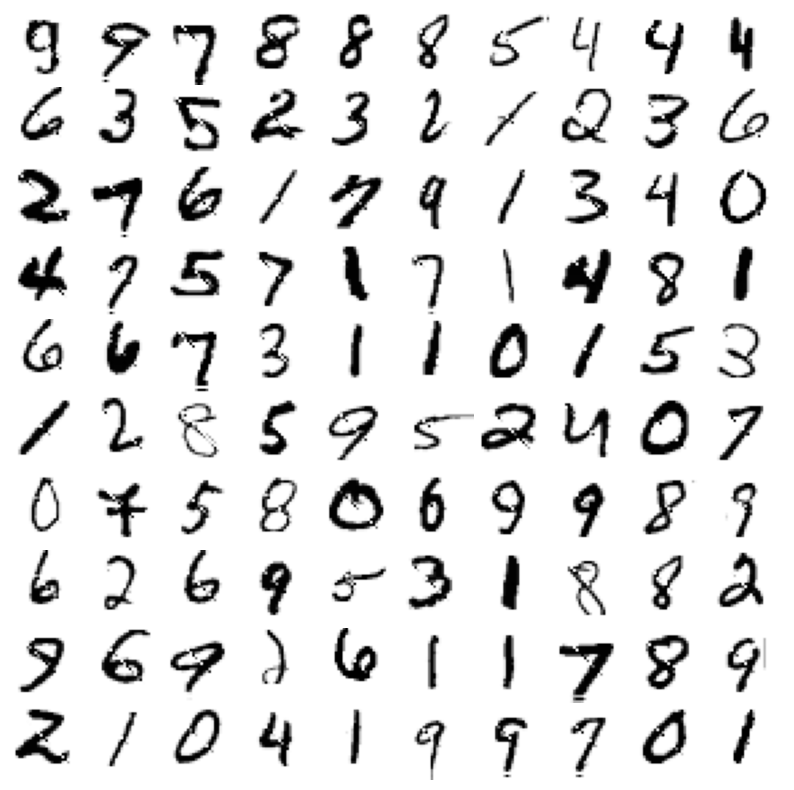

In [14]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]
displayData(sel)

### 1.3 Vectorización de regresión logística

Se utilizará múltiples modelos de regresión logística uno contra todos para construir un clasificador de clases múltiples. Dado que hay 10 clases, deberá entrenar 10 clasificadores de regresión logística separados. Para que esta capacitación sea eficiente, es importante asegurarse de que el código esté bien vectorizado.

En esta sección, se implementará una versión vectorizada de regresión logística que no emplea ningún bucle "for".

Para probar la regresión logística vectorizada, se usara datos personalizados como se definen a continuación.

In [15]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='C')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3

#### 1.3.1 Vectorización de la funcion de costo
#### 1.3.2 Vectorización del gradiente

In [16]:
def sigmoid(z):
    """
    Calcula la sigmoide de z.
    """
    return 1.0 / (1.0 + np.exp(-z))

In [17]:
def lrCostFunction(theta, X, y, lambda_):
    """
    Calcula el costo de usar theta como parámetro para la regresión logística regularizada y
    el gradiente del costo w.r.t. a los parámetros.

    Parametros
    ----------
    theta : array_like
        Parametro theta de la regresion logistica. Vector de la forma(shape) (n, ). n es el numero de caracteristicas
        incluida la intercepcion

    X : array_like
        Dataset con la forma(shape) (m x n). m es el numero de ejemplos, y n es el numero de
        caracteristicas (incluida la intercepcion).

    y : array_like
        El conjunto de etiquetas. Un vector con la forma (shape) (m, ). m es el numero de ejemplos

    lambda_ : float
        Parametro de regularización.

    Devuelve
    -------
    J : float
        El valor calculado para la funcion de costo regularizada.

    grad : array_like
        Un vector de la forma (shape) (n, ) que es el gradiente de la
        función de costo con respecto a theta, en los valores actuales de theta..
    """
    # Inicializa algunos valores utiles
    m = y.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    temp = theta
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad

#### 1.3.3 Vectorización regularizada de la regresión logística


In [18]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo         : {:.6f}'.format(J))
print('Costo esperadot: 2.534819')
print('-----------------------')
print('Gradientes:')
print(' [{:.6f}, {:.6f}, {:.6f}, {:.6f}]'.format(*grad))
print('Gradientes esperados:')
print(' [0.146561, -0.548558, 0.724722, 1.398003]');

Costo         : 2.590001
Costo esperadot: 2.534819
-----------------------
Gradientes:
 [-0.121257, -0.603109, 0.584765, 1.172639]
Gradientes esperados:
 [0.146561, -0.548558, 0.724722, 1.398003]


### 1.4 Clasificacion One-vs-all

In [19]:
def oneVsAll(X, y, num_labels, lambda_):
    """
    Trains num_labels logistic regression classifiers and returns
    each of these classifiers in a matrix all_theta, where the i-th
    row of all_theta corresponds to the classifier for label i.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). m is the number of
        data points, and n is the number of features. Note that we
        do not assume that the intercept term (or bias) is in X, however
        we provide the code below to add the bias term to X.

    y : array_like
        The data labels. A vector of shape (m, ).

    num_labels : int
        Number of possible labels.

    lambda_ : float
        The logistic regularization parameter.

    Returns
    -------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        (ie. `numlabels`) and n is number of features without the bias.
    """
    # algunas variables utiles
    m, n = X.shape

    # print(m, n)
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega unos a la matriz X
    X = np.concatenate([np.ones((m, 1)), X], axis=1)

    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 50}
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                (X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                #method='BFGS',
                                options=options)
        # print(res)
        all_theta[c] = res.x

    return all_theta

In [20]:
lambda_ = 0.001
all_theta = oneVsAll(X, y, num_labels, lambda_)

<ipython-input-16-575a438e2fc3>:5: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-z))
<ipython-input-17-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-17-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-17-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-17-179220550d1c>:46: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
<ipython-input-17-179220550d1c>:46: RuntimeWarning: divide by zero 

In [21]:
print(all_theta.shape)
print(all_theta[0])

(10, 785)
[-1.52643631e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -5.21624557e-07  0.00000000e+00  0.00000000e+00 -1.29993917e-06
 -1.49557343e-05 -1.60297756e-04 -2.26119913e-04 -9.69424257e-05
 -1.47955701e-04 -1.43379709e-04 -1.15452279e-03 -2.05707848e-03
 -1.21547458e-03 -5.51674016e-04 -5.38128147e-04 -1.03571948e-04
 -7.60938305e-04 -1.73743708e-03 -1.12426827e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -8.08771467e-07 -5.71836012e-05 -4.40822494e-05 -8.58779886e-05
 -1.50341918e-03 -1.01193201e-03 -5.52715289e-04 -5.34814522e-03
 -4.10432387e-03 -5.97531637e-03 -4.98777042e-03 -2.34575468e-03
 -2.38221622e-03 -2.33210662e-03 -3.13715483e-03 -2.81642885e-03
 -3.00146133e-03 -2.29743766e-03 -3.34376579e-04 -3.21290012e-05
 -9.82627030e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.91844703e-07  0.00000000e+00
 -3.18013238e-0

#### 1.4.1 Prediccion One-vs-all

In [22]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Add ones to the X data matrix
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

#### Comprobamos la predicción de los datos de entenamiento

(4000, 784)
Precision del conjuto de entrenamiento: 99.20%
(100, 784)
(100, 785)
111

[8 4 9 7 0 7 1 1 9 6 7 3 8 7 3 0 8 9 6 5 8 3 5 4 6 4 5 4 6 7 7 5 9 5 8 6 6
 2 7 4 5 5 8 3 9 8 4 8 9 8 9 8 5 0 3 2 2 4 2 1 1 8 8 9 2 2 2 4 0 1 6 4 6 0
 9 1 7 9 7 6 2 8 9 4 9 0 3 5 2 1 1 6 0 9 4 2 2 4 1 0] [8 4 9 7 0 7 1 1 9 6 7 3 8 7 3 0 8 9 6 5 9 3 5 4 6 4 5 4 6 7 7 5 9 5 8 6 6
 2 7 4 5 5 5 3 9 8 4 8 9 8 9 8 5 0 3 2 2 4 2 1 1 8 8 9 2 2 2 4 0 1 6 4 6 0
 9 1 7 9 7 6 2 8 9 4 9 0 3 5 2 1 1 6 0 9 4 2 2 4 1 0]
222



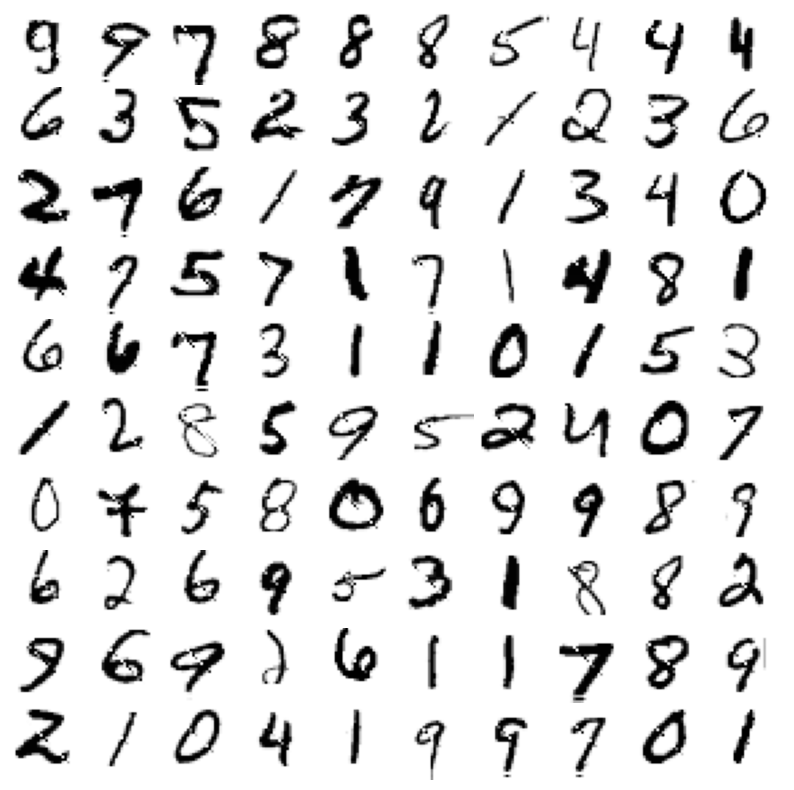

In [23]:
print(X.shape)
pred = predictOneVsAll(all_theta, X)
print('Precision del conjuto de entrenamiento: {:.2f}%'.format(np.mean(pred == y) * 100))
# XPrueba = X[4490:4590, :].copy()

# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
XPrueba = X[rand_indices, :]
XPruebaV = XPrueba.copy()


print(XPrueba.shape)
#print(np.ones((1)))
#print(XPrueba)
#p = np.zeros(1)
XPrueba = np.concatenate([np.ones((100, 1)), XPrueba], axis=1)
print(XPrueba.shape)
p = np.argmax(sigmoid(XPrueba.dot(all_theta.T)), axis = 1)
print("111\n")
print(p, y[rand_indices])
print("222\n")
displayData(XPruebaV)

#### Comprobando los 20% del total como datos de prueba

Precision del conjunto de prueba: 94.90%
Predicciones en todo el conjunto de prueba:
[8 9 7 8 8 8 5 4 4 4 6 3 8 8 3 2 1 2 3 6 2 7 6 1 7 9 1 3 4 0 4 7 5 7 1 7 1
 4 8 1 6 6 7 3 1 1 0 1 5 3 1 2 8 5 9 5 2 4 0 7 0 7 8 8 0 6 9 9 8 9 6 2 6 9
 6 3 1 8 8 2 9 6 9 2 6 1 1 7 8 9 2 1 0 4 1 9 9 7 0 1 8 8 3 1 2 0 7 1 3 7 9
 2 1 0 2 0 0 7 3 5 2 2 7 2 6 5 8 4 6 8 8 0 3 6 4 4 7 4 7 6 6 4 4 8 3 3 5 2
 0 1 2 1 2 4 8 5 3 5 5 5 0 0 5 9 5 9 6 8 6 8 4 8 0 3 0 5 7 9 0 1 9 0 6 9 8
 5 6 4 4 6 8 4 8 9 3 0 1 8 2 6 6 0 3 5 2 0 6 8 9 8 2 4 1 9 4 8 6 9 6 2 3 3
 7 7 5 4 5 5 5 1 8 0 5 8 3 2 6 7 4 7 1 1 5 4 8 4 5 9 6 8 4 7 2 8 4 8 9 6 1
 5 3 8 7 6 9 9 9 9 3 0 0 2 1 1 4 2 6 7 6 9 5 2 8 8 2 2 2 0 7 4 1 4 3 0 2 7
 1 9 4 1 7 6 1 1 6 0 1 3 2 2 3 5 9 8 0 0 4 8 0 7 2 7 0 2 8 2 1 6 2 0 5 5 8
 2 8 8 3 0 3 2 0 3 4 8 4 1 2 7 8 6 3 8 8 8 8 6 0 5 7 6 6 3 6 2 3 2 6 9 1 1
 8 2 1 4 9 6 9 7 0 7 8 0 7 7 6 0 2 6 8 8 4 9 7 0 8 4 8 0 8 0 5 9 6 7 4 0 5
 7 3 0 2 7 4 8 2 8 6 9 4 8 6 4 1 8 9 1 2 3 1 0 9 4 1 5 5 0 1 5 8 8 7 5 4 9
 8 6 3 1 1 6 6 

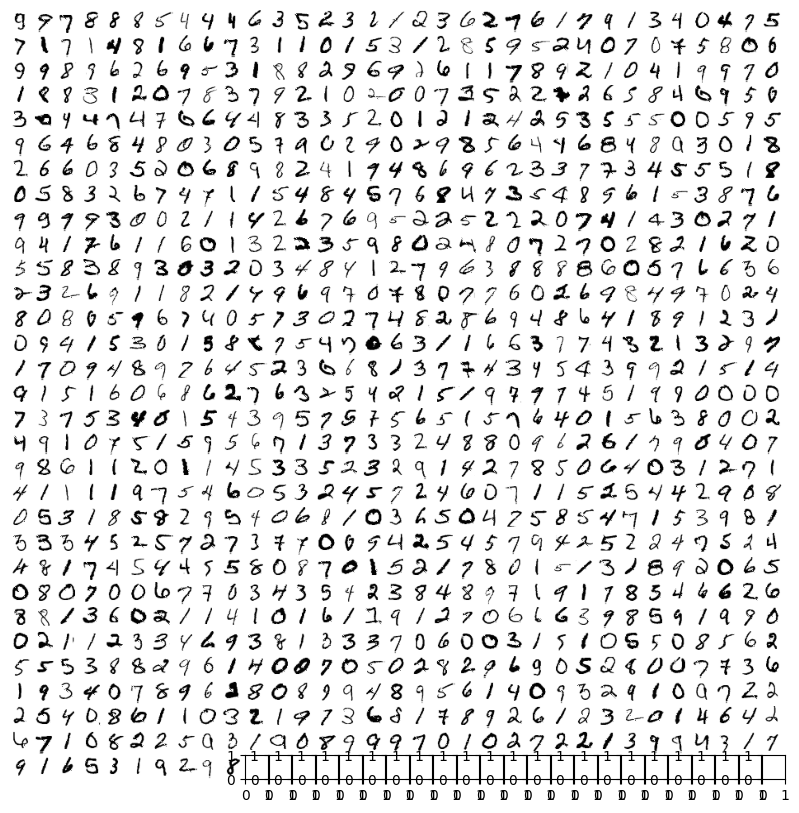

In [24]:

# Predicciones en el conjunto de prueba
pred_test = predictOneVsAll(all_theta, X_test)
accuracy = np.mean(pred_test == y_test) * 100
print('Precision del conjunto de prueba: {:.2f}%'.format(accuracy))

# Agrega una columna de unos para el término de sesgo
X_test_with_bias = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Predicciones en todo el conjunto de prueba
p_test = np.argmax(sigmoid(X_test_with_bias.dot(all_theta.T)), axis=1)
print("Predicciones en todo el conjunto de prueba:")
print(p_test, y_test)

# Muestra los datos del conjunto de prueba
displayData(X_test)

